In [2]:
from kce.evaluate import pre_process, node_classification_pipeline
from kce.walk_based import deepwalk, corewalk
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import sklearn

In [3]:
G = nx.read_gml(".\\..\\data\\dblp.gml" )

In [24]:
params = dict(
    out_dim=150,
    n_walks=15,
    walk_length=25,
    win_size=5,
)

## Training

In [27]:
res_deep = node_classification_pipeline(graph=G,
                                embedder=deepwalk.DeepWalk(**params),
                                classifier=sklearn.linear_model.LogisticRegression(C=1))

C:\Users\sbran\Anaconda3\envs\projet_recherche\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sbran\Anaconda3\envs\projet_recherche\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [26]:
res = node_classification_pipeline(G,
                                embedder=corewalk.CoreWalkLinear(**params),
                                classifier=sklearn.linear_model.LogisticRegression(C=1))

C:\Users\sbran\Anaconda3\envs\projet_recherche\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sbran\Anaconda3\envs\projet_recherche\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


26


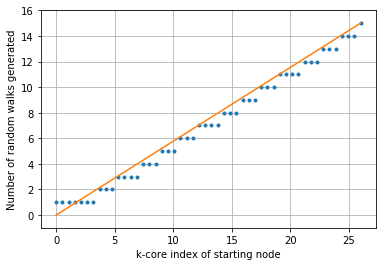

In [40]:
k_max = max(nx.core_number(G).values())
print(k_max)

cw = corewalk.CoreWalkLinear(**params)

X = np.linspace(0, k_max)

plt.figure(figsize=(6,4))
plt.plot(X, [cw._n_walks(k, k_max) for k in X], '.')
plt.plot(X, params["n_walks"]*X/k_max)
plt.grid()
plt.ylim(-1, params["n_walks"] +1 )
plt.xlabel("k-core index of starting node")
plt.ylabel("Number of random walks generated")
plt.show()

In [30]:
range(k_max + 1)

range(0, 27)

## Display results

In [28]:
print("--- Vanilla DeepWalk ---")
print("Micro F1 score: {:.3f}".format(res_deep["micro_f1"]))
print("Macro F1 score: {:.3f}".format(res_deep["macro_f1"]))
print("Exec time: {:.2f} s".format(res_deep["rw_gen_time"] + res_deep["embed_train_time"]))
print()
print("--- Modified DeepWalk ---")
print("Micro F1 score: {:.3f}  (- {:.2f} %)"
      .format(res["micro_f1"], 
              (res_deep["micro_f1"] - res["micro_f1"]) * 100 / res_deep["micro_f1"]
             ))
print("Macro F1 score: {:.3f}  (- {:.2f} %)"
      .format(res["macro_f1"], 
              (res_deep["macro_f1"] - res["macro_f1"]) * 100 / res_deep["macro_f1"]
             ))
print("Exec time: {:.2f} s     (- {:.2f} %)".format(
    res["rw_gen_time"] + res["embed_train_time"],
    ((res_deep["rw_gen_time"] + res_deep["embed_train_time"]) - (res["rw_gen_time"] + res["embed_train_time"])) * 100 / (res_deep["rw_gen_time"] + res_deep["embed_train_time"])
    ))

--- Vanilla DeepWalk ---
Micro F1 score: 0.572
Macro F1 score: 0.489
Exec time: 787.28 s

--- Modified DeepWalk ---
Micro F1 score: 0.571  (- 0.32 %)
Macro F1 score: 0.483  (- 1.23 %)
Exec time: 107.33 s     (- 86.37 %)


# Citeseer

In [48]:
G = nx.read_gml(".\\..\\data\\citeseer.gml" )
G.remove_edges_from(nx.selfloop_edges(G))
G = nx.k_core(G, 1)

In [49]:
params = dict(
    out_dim=150,
    n_walks=15,
    walk_length=25,
    win_size=5,
)

## Training

In [54]:
res_deep = node_classification_pipeline(graph=G,
                                embedder=deepwalk.DeepWalk(**params),
                                classifier=sklearn.linear_model.LogisticRegression(C=1))

C:\Users\sbran\Anaconda3\envs\projet_recherche\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sbran\Anaconda3\envs\projet_recherche\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [53]:
res = node_classification_pipeline(G,
                                embedder=corewalk.CoreWalkLinear(**params),
                                classifier=sklearn.linear_model.LogisticRegression(C=1))

C:\Users\sbran\Anaconda3\envs\projet_recherche\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sbran\Anaconda3\envs\projet_recherche\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


7


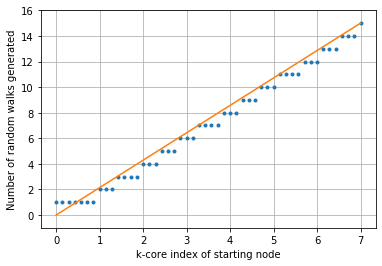

In [52]:
k_max = max(nx.core_number(G).values())
print(k_max)

cw = corewalk.CoreWalkLinear(**params)

X = np.linspace(0, k_max)

plt.figure(figsize=(6,4))
plt.plot(X, [cw._n_walks(k, k_max) for k in X], '.')
plt.plot(X, params["n_walks"]*X/k_max)
plt.grid()
plt.ylim(-1, params["n_walks"] +1 )
plt.xlabel("k-core index of starting node")
plt.ylabel("Number of random walks generated")
plt.show()

In [30]:
range(k_max + 1)

range(0, 27)

## Display results

In [55]:
print("--- Vanilla DeepWalk ---")
print("Micro F1 score: {:.3f}".format(res_deep["micro_f1"]))
print("Macro F1 score: {:.3f}".format(res_deep["macro_f1"]))
print("Exec time: {:.2f} s".format(res_deep["rw_gen_time"] + res_deep["embed_train_time"]))
print()
print("--- Modified DeepWalk ---")
print("Micro F1 score: {:.3f}  (- {:.2f} %)"
      .format(res["micro_f1"], 
              (res_deep["micro_f1"] - res["micro_f1"]) * 100 / res_deep["micro_f1"]
             ))
print("Macro F1 score: {:.3f}  (- {:.2f} %)"
      .format(res["macro_f1"], 
              (res_deep["macro_f1"] - res["macro_f1"]) * 100 / res_deep["macro_f1"]
             ))
print("Exec time: {:.2f} s     (- {:.2f} %)".format(
    res["rw_gen_time"] + res["embed_train_time"],
    ((res_deep["rw_gen_time"] + res_deep["embed_train_time"]) - (res["rw_gen_time"] + res["embed_train_time"])) * 100 / (res_deep["rw_gen_time"] + res_deep["embed_train_time"])
    ))

--- Vanilla DeepWalk ---
Micro F1 score: 0.478
Macro F1 score: 0.426
Exec time: 76.29 s

--- Modified DeepWalk ---
Micro F1 score: 0.483  (- -1.18 %)
Macro F1 score: 0.427  (- -0.27 %)
Exec time: 21.80 s     (- 71.42 %)


# Homo Sapiens

In [57]:
G = nx.read_gml(".\\..\\data\\homo_sapiens.gml" )
G.remove_edges_from(nx.selfloop_edges(G))
G = nx.k_core(G, 1)

In [58]:
params = dict(
    out_dim=150,
    n_walks=15,
    walk_length=25,
    win_size=5,
)

## Training

In [ ]:
res_deep = node_classification_pipeline(graph=G,
                                embedder=deepwalk.DeepWalk(**params),
                                classifier=sklearn.linear_model.LogisticRegression(C=1))

In [59]:
res = node_classification_pipeline(G,
                                embedder=corewalk.CoreWalkLinear(**params),
                                classifier=sklearn.linear_model.LogisticRegression(C=1))

C:\Users\sbran\Anaconda3\envs\projet_recherche\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: Unknown label type: 'unknown'

7


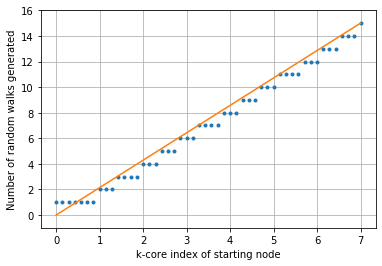

In [52]:
k_max = max(nx.core_number(G).values())
print(k_max)

cw = corewalk.CoreWalkLinear(**params)

X = np.linspace(0, k_max)

plt.figure(figsize=(6,4))
plt.plot(X, [cw._n_walks(k, k_max) for k in X], '.')
plt.plot(X, params["n_walks"]*X/k_max)
plt.grid()
plt.ylim(-1, params["n_walks"] +1 )
plt.xlabel("k-core index of starting node")
plt.ylabel("Number of random walks generated")
plt.show()

In [30]:
range(k_max + 1)

range(0, 27)

## Display results

In [ ]:
print("--- Vanilla DeepWalk ---")
print("Micro F1 score: {:.3f}".format(res_deep["micro_f1"]))
print("Macro F1 score: {:.3f}".format(res_deep["macro_f1"]))
print("Exec time: {:.2f} s".format(res_deep["rw_gen_time"] + res_deep["embed_train_time"]))
print()
print("--- Modified DeepWalk ---")
print("Micro F1 score: {:.3f}  (- {:.2f} %)"
      .format(res["micro_f1"], 
              (res_deep["micro_f1"] - res["micro_f1"]) * 100 / res_deep["micro_f1"]
             ))
print("Macro F1 score: {:.3f}  (- {:.2f} %)"
      .format(res["macro_f1"], 
              (res_deep["macro_f1"] - res["macro_f1"]) * 100 / res_deep["macro_f1"]
             ))
print("Exec time: {:.2f} s     (- {:.2f} %)".format(
    res["rw_gen_time"] + res["embed_train_time"],
    ((res_deep["rw_gen_time"] + res_deep["embed_train_time"]) - (res["rw_gen_time"] + res["embed_train_time"])) * 100 / (res_deep["rw_gen_time"] + res_deep["embed_train_time"])
    ))